# Stock Price Prediction

##1st import all the library

In [ ]:

import pandas  as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


##read the data set

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/ADANIENT (1).NS.csv")
dataset


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,45.553741,49.422543,44.872616,49.095600,47.614208,10963906
1,2016-01-04,48.768658,50.158157,45.907928,46.371094,44.971912,9408965
2,2016-01-05,46.670792,48.823151,45.880684,48.278248,46.821522,9801814
3,2016-01-06,47.951309,48.468964,46.480076,46.997730,45.579639,7093448
4,2016-01-07,46.262115,46.262115,42.502296,43.564854,42.250347,8919023
...,...,...,...,...,...,...,...
1745,2023-01-23,3443.050049,3460.000000,3412.550049,3436.350098,3436.350098,974857
1746,2023-01-24,3447.449951,3508.000000,3430.000000,3442.000000,3442.000000,1518123
1747,2023-01-25,3422.000000,3428.000000,3315.000000,3388.949951,3388.949951,3686439
1748,2023-01-27,3335.000000,3346.500000,2712.000000,2761.449951,2761.449951,14764368


In [ ]:
print(dataset.describe())

              Open         High          Low        Close    Adj Close  \
count  1750.000000  1750.000000  1750.000000  1750.000000  1750.000000   
mean    688.173234   700.569161   675.238559   688.457278   687.474594   
std    1021.967477  1036.977084  1004.148913  1021.222423  1021.504948   
min      32.149174    33.402447    31.713251    32.012947    31.047001   
25%      74.134321    75.891117    72.430996    74.392643    73.068065   
50%     148.150002   152.000000   144.975006   148.025002   146.764984   
75%    1193.587524  1237.750000  1173.500000  1198.837524  1197.533173   
max    4175.000000  4190.000000  4066.399902  4165.299805  4165.299805   

             Volume  
count  1.750000e+03  
mean   7.511264e+06  
std    1.019781e+07  
min    2.482490e+05  
25%    2.789816e+06  
50%    4.716164e+06  
75%    8.319164e+06  
max    1.701502e+08  


In [ ]:
 dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1750 non-null   object 
 1   Open       1750 non-null   float64
 2   High       1750 non-null   float64
 3   Low        1750 non-null   float64
 4   Close      1750 non-null   float64
 5   Adj Close  1750 non-null   float64
 6   Volume     1750 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 95.8+ KB


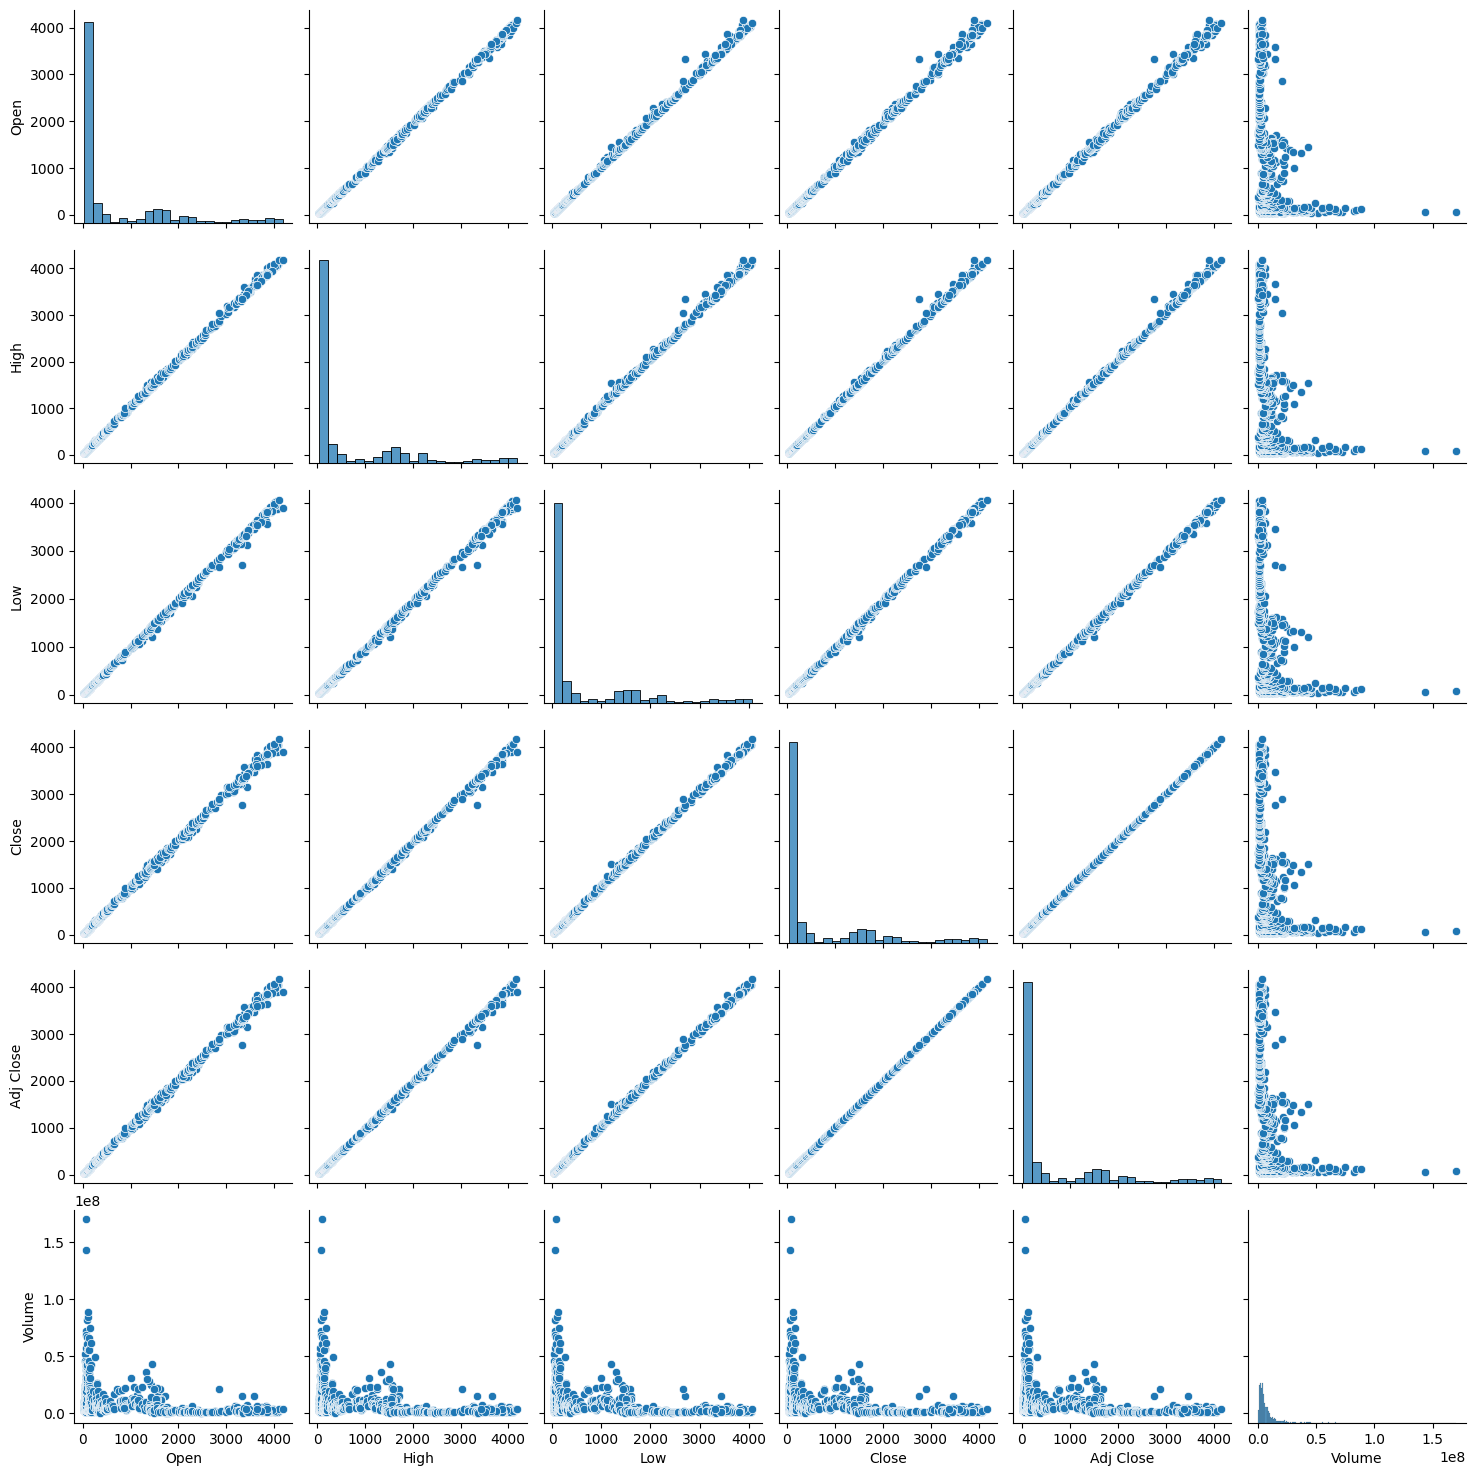

In [ ]:
import pandas as pd
import seaborn as sns


# Plot the data distribution for all columns
sns.pairplot(dataset)

# Show the plot
plt.show()


<Axes: >

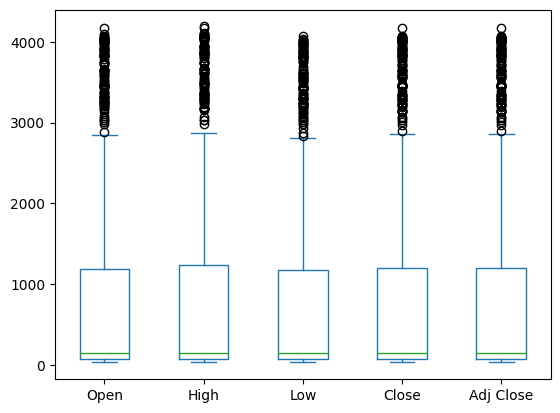

In [ ]:
dataset[['Open','High','Low','Close','Adj Close']].plot(kind='box')

##this is all inmformation about our data

##we are arranging the data set in month wise

In [ ]:
dataset["Date"]=pd.to_datetime(dataset["Date"])

In [ ]:
dataset["Date"]=pd.DatetimeIndex(dataset["Date"]).month

## Finding the co-relation coefficient



In [ ]:
dataset.corr()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.121326,0.121208,0.122590,0.122184,0.122253,-0.070510
Open,0.121326,1.000000,0.999848,0.999673,0.999554,0.999554,-0.231670
High,0.121208,0.999848,1.000000,0.999640,0.999761,0.999761,-0.229222
Low,0.122590,0.999673,0.999640,1.000000,0.999827,0.999827,-0.233813
Close,0.122184,0.999554,0.999761,0.999827,1.000000,1.000000,-0.230888
Adj Close,0.122253,0.999554,0.999761,0.999827,1.000000,1.000000,-0.230953
Volume,-0.070510,-0.231670,-0.229222,-0.233813,-0.230888,-0.230953,1.000000


In [ ]:
feature=["Adj Close","Open","High","Low"]

x=dataset[feature].values

y=dataset["Close"].values

## This x is our input variable

In [ ]:
x

array([[  47.614208,   45.553741,   49.422543,   44.872616],
       [  44.971912,   48.768658,   50.158157,   45.907928],
       [  46.821522,   46.670792,   48.823151,   45.880684],
       ...,
       [3388.949951, 3422.      , 3428.      , 3315.      ],
       [2761.449951, 3335.      , 3346.5     , 2712.      ],
       [2892.850098, 2850.      , 3037.550049, 2665.      ]])

In [ ]:
y

array([  49.0956  ,   46.371094,   48.278248, ..., 3388.949951,
       2761.449951, 2892.850098])

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)

In [ ]:
abc=pd.DataFrame(x_scaled)
abc

,0,1,2,3
0,-0.626569,-0.628986,-0.628107,-0.627941
1,-0.629156,-0.625839,-0.627398,-0.626910
2,-0.627345,-0.627893,-0.628685,-0.626937
3,-0.628561,-0.626639,-0.629027,-0.626340
4,-0.631821,-0.628293,-0.631156,-0.630302
...,...,...,...,...
1745,2.691775,2.696430,2.661794,2.726781
1746,2.697307,2.700737,2.708096,2.744164
1747,2.645359,2.675827,2.630926,2.629606
1748,2.030894,2.590673,2.552310,2.028926


simpale Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=1500)

In [ ]:
from sklearn.linear_model import LinearRegression
l1=LinearRegression()
l1.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression

# create a LinearRegression object
model = LinearRegression()

# fit the model using training data
model.fit(x_train, y_train)

# predict the output for test data
y_pred = model.predict(x_test)


In [ ]:
y_pred=l1.predict(x_test)
y_pred

array([1662.87150536, 1750.91923515,   42.71299401, 1157.18705941,
         71.06857402, 1285.21001571,  206.82864855,   38.46713927,
       1705.17713319,  152.53459789,  360.17211777,   42.55313988,
       2118.99423566,   71.36044554,   84.97278673, 1593.63752385,
         40.04212201,  174.13617121,  292.31692058,   53.42132729,
         53.20617659,   35.77204731,   76.62735598,  146.21904156,
         75.5541212 ,   81.22857841,  536.48717263,   40.28268302,
         55.21080526,  125.30425324, 1485.77215405,   35.82503056,
        360.77116895,   67.0423199 ,  158.37325071,  152.58832318,
         37.10513458,   71.38826172,   41.29959621,   37.69299466,
         42.04564748,   44.47546289,  148.65662584, 1870.11093749,
        214.06501141,   84.39447605,  115.62879134, 3827.10902581,
        119.76958233,   38.36223198, 1849.15315718,   62.50347375,
         62.20933914, 2053.89859571,  340.4135466 ,   36.81114276,
        525.85634768,  125.11364926,  158.59892409,  149.91744

In [ ]:
x_train.shape

(1225, 4)

In [ ]:
y_pred.shape

(525,)

In [ ]:
l1.intercept_

688.4520734410031

In [ ]:
l1.coef_

array([ 1.02102638e+03, -7.59822533e-01,  1.20525918e+00, -5.42916926e-01])

In [ ]:
y=1.02*(37.045013)-7.5*(40.213711) + 1.2*(40.486160) -5.4*(37.162262) + 688

In [ ]:
y

272.0902579599999

In [ ]:
from sklearn.metrics import r2_score
ac=r2_score(y_test,y_pred)
ac

0.9999998134180801

In [ ]:
def mean_squared_error(y_test, y_pred):
    """
    Calculates the mean squared error between the true labels and predicted labels.
    """
    mse = np.mean((y_test - y_pred) ** 2)
    return mse

In [ ]:
def r2_score(y_test, y_pred):
    """
    Calculates the R-squared score between the true labels and predicted labels.
    """
    mean_y_true = np.mean(y_test)
    sst = np.sum((y_test - mean_y_true) ** 2)
    ssr = np.sum((y_test - y_pred) ** 2)
    r2 = 1 - (ssr / sst)
    return r2

In [ ]:
close=l1.predict([[37.045013,40.213711,40.486160,37.162262]])
close

array([38510.45242815])

In [ ]:
mean_squared_error(y_test, y_pred)

0.20732774733439696

In [ ]:
r2_score(y_test, y_pred)

0.9999998134180801